### Question 3:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes_df = pd.read_excel('Diabetes_Data.xlsx')  # Ensure to replace with your actual file path
diabetes_data = diabetes_df.iloc[:, :-1]
diabetes_df.head()

AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135

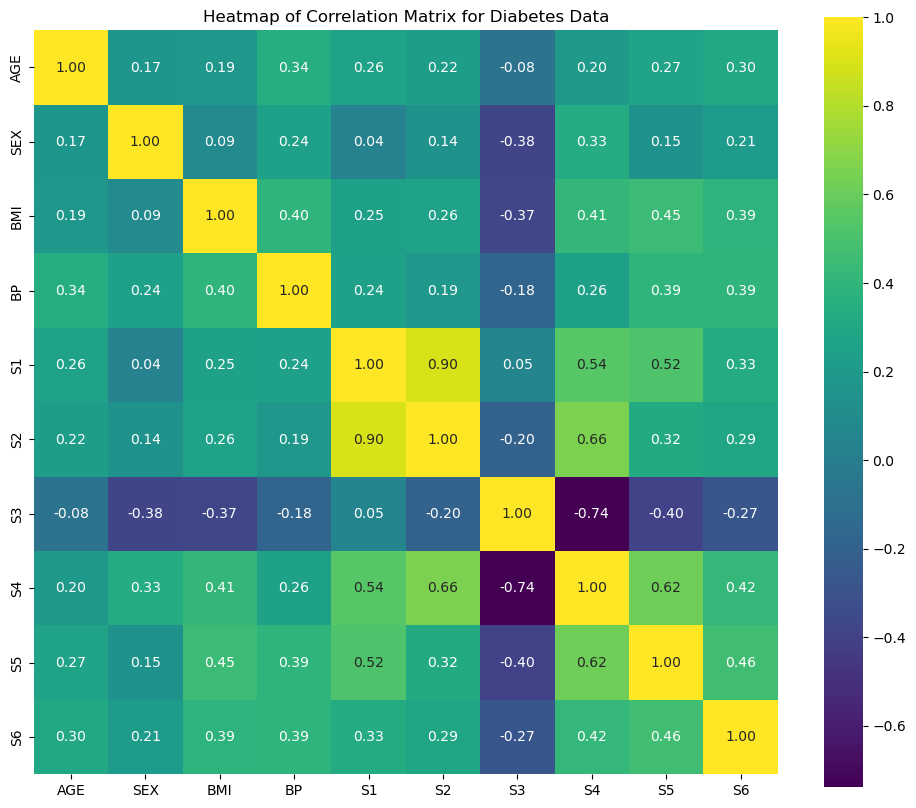

In [3]:
# Calculate the correlation matrix for the explanatory variables
correlation_matrix = diabetes_data.corr()
#print(correlation_matrix)
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True)
plt.title('Heatmap of Correlation Matrix for Diabetes Data')
plt.show()

In [4]:
import statsmodels.api as sm

# Define independent variables (X) and dependent variable (y)
independent_vars = diabetes_df.iloc[:, :-1]  # All columns except the last one
dependent_var = diabetes_df.iloc[:, -1]       # Last column as dependent variable

# Add an intercept term to the model
independent_vars_with_const = sm.add_constant(independent_vars)

# Fit the Ordinary Least Squares (OLS) regression model
regression_model = sm.OLS(dependent_var, independent_vars_with_const).fit()

# Calculate Mean Squared Error (MSE) and Adjusted R² value
mean_squared_error = ((regression_model.resid) ** 2).mean()
adjusted_r_squared = regression_model.rsquared_adj

print(f'Mean Squared Error (MSE): {mean_squared_error:.4f}')
print(f'Adjusted R²: {adjusted_r_squared:.4f}')
print(regression_model.summary())

Mean Squared Error (MSE): 2859.6963
Adjusted R²: 0.5066
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           3.83e-62
Time:                        21:50:27   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [5]:
import pandas as pd
import statsmodels.api as sm
# Define dependent and independent variables using the original subset_data
# Define independent variables (X) and dependent variable (y)
independent_vars = diabetes_df.iloc[:, :-1]  # All columns except the last one
dependent_var = diabetes_df.iloc[:, -1]       # Last column as dependent variable

# Add a constant term for the intercept
independent_vars_with_const = sm.add_constant(independent_vars)

# Fit the initial OLS model
full_model = sm.OLS(dependent_var, independent_vars_with_const).fit()

def forward_selection(X, y, entry_threshold=0.05):
    """Perform forward selection for stepwise regression."""
    selected_features = []
    remaining_features = list(X.columns)
    
    while remaining_features:
        best_p_value = float('inf')
        best_feature = None
        
        for feature in remaining_features:
            # Fit model with the current feature added
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            p_value = model.pvalues[feature]
            
            # Check if p-value is the best so far
            if p_value < best_p_value:
                best_p_value = p_value
                best_feature = feature
        
        # If the best feature's p-value is below the entry threshold, add it to the model
        if best_p_value < entry_threshold:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break  # Stop if no more features meet the criteria

    return selected_features

# Execute forward selection
optimal_features_forward = forward_selection(independent_vars, dependent_var)
print("Optimal Features Selected (Forward Selection):", optimal_features_forward)

# Fit final model with selected features
final_model = sm.OLS(dependent_var, sm.add_constant(independent_vars[optimal_features_forward])).fit()

# Calculate Mean Squared Error (MSE)
mse_final = ((final_model.resid) ** 2).mean()

# Get R² value from the final model
r_squared_final = final_model.rsquared
print(final_model.summary())
# Output MSE and R² values
print(f'Mean Squared Error (Final Model): {mse_final:.4f}')
print(f'R² Value (Final Model): {r_squared_final:.4f}')

Optimal Features Selected (Forward Selection): ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     76.95
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           3.01e-65
Time:                        21:50:27   Log-Likelihood:                -2387.3
No. Observations:                 442   AIC:                             4789.
Df Residuals:                     435   BIC:                             4817.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

### Question 4: Titanic Analysis

In [7]:
titanic_data = pd.read_csv("titanic3.csv")

In [8]:
# Calculate survival probability using value_counts
survival_counts = titanic_data['survived'].value_counts(normalize=True)
probability_of_survival = survival_counts.get(1, 0)  # Get probability of survival (1)
print(f'Probability of survival: {probability_of_survival:.2f}')

Probability of survival: 0.38


In [9]:
titanic_data['age'].max()

80.0

## 4.3

In [11]:

# Create age bins
bins = [0, 12, 18, 30, 50, 80]  # Define age groups
labels = ['0-12', '13-18', '19-30', '31-50', '51-80']  # Labels for the bins


# Create a pivot table for survival probabilities
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels)

# Create a pivot table for survival probabilities
survival_pivot = titanic_data.pivot_table(
    values='survived',         # Calculate mean of the 'survived' column
    index=['pclass', 'sex'],   # Rows: Passenger Class and Gender
    columns='age_group',       # Columns: Age Groups
    aggfunc='mean'             # Aggregate function: mean survival rate
)

# Rename columns for better readability
survival_pivot.columns.name = 'Age Group'
survival_pivot.index.names = ['Passenger Class', 'Gender']

# Display the survival probability pivot table
print(survival_pivot)

Age Group                   0-12     13-18     19-30     31-50     51-80
Passenger Class Gender                                                  
1               female  0.000000  1.000000  0.972222  0.964912  0.962963
                male    1.000000  0.500000  0.375000  0.364865  0.216216
2               female  1.000000  0.875000  0.869565  0.937500  0.500000
                male    1.000000  0.000000  0.102941  0.075472  0.062500
3               female  0.466667  0.607143  0.459016  0.375000  1.000000
                male    0.342857  0.081081  0.179191  0.138298  0.000000


C:\Users\STUDENT\AppData\Local\Temp\ipykernel_6576\3970459227.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_pivot = titanic_data.pivot_table(


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

# Step 2: Data Preprocessing
# Fill missing values for 'fare' and 'age' with their median
titanic_data['fare'] = titanic_data['fare'].fillna(titanic_data['fare'].median())
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].median())

# Convert 'sex' to numeric (male: 0, female: 1)
titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})

# Prepare features (X) and target variable (y)
X = titanic_data[['pclass', 'sex', 'age']]  # Using pclass, sex, and age for modeling
y = titanic_data['survived']

# Step 3: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit logistic regression model on training data using sklearn
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on test data
y_pred = model.predict(X_test)



In [13]:
# Confusion Matrix Structure
# [[TN, FP],
#  [FN, TP]]
#
# Where:
# - True Positive (TP): Survived and predicted as survived
# - True Negative (TN): Not survived and predicted as not survived
# - False Positive (FP): Not survived but predicted as survived (Type I error)
# - False Negative (FN): Survived but predicted as not survived (Type II error)



# Step 6: Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {accuracy:.2f}')

# Step 7: Get parameter estimates (coefficients)
coefficients = model.coef_[0]
intercept = model.intercept_[0]

print("\nParameter Estimates:")
print(f"Intercept: {intercept}")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

# Step 8: Statistical significance and confidence intervals using statsmodels
# Add a constant to the features for the intercept term
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the summary
print("\nLogistic Regression Summary:")
print(result.summary())

# Extract p-values and confidence intervals
p_values = result.pvalues
conf = result.conf_int()
conf['OR'] = result.params
conf.columns = ['2.5%', '97.5%', 'OR']

print("\nP-values and Confidence Intervals:")
print(conf)

# Optional: Interpret the results
for feature, coef, p_value in zip(['Intercept'] + list(X.columns), [intercept] + list(coefficients), [result.pvalues[0]] + list(p_values[1:])):
    if p_value < 0.05:
        significance = 'Significant'
    else:
        significance = 'Not Significant'
    print(f"{feature}: Estimate = {coef}, P-value = {p_value:.4f}, {significance}")


Confusion Matrix:
[[128  16]
 [ 43  75]]
Classification Accuracy: 0.77

Parameter Estimates:
Intercept: 1.4939082649657438
pclass: -0.9938234177766375
sex: 2.471145686781338
age: -0.02843625815677062
Optimization terminated successfully.
         Current function value: 0.462789
         Iterations 6

Logistic Regression Summary:
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1047
Model:                          Logit   Df Residuals:                     1043
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.2947
Time:                        21:50:28   Log-Likelihood:                -484.54
converged:                       True   LL-Null:                       -687.00
Covariance Type:            nonrobust   LLR p-value:                 1.906e-87
                 coef    std err    

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_6576\3556943950.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for feature, coef, p_value in zip(['Intercept'] + list(X.columns), [intercept] + list(coefficients), [result.pvalues[0]] + list(p_values[1:])):
